# My Daily Weight Data

Weighed daily on the same scale, everyday at approximately the same time and conditions.

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as graph
import seaborn as sns

figure_size = (14, 6)
sns.set(font_scale=1.5, rc={'figure.figsize': figure_size})
sns.set_style('whitegrid')

%matplotlib inline

In [3]:
# Get Data
raw = pd.read_csv('data/weight/AnthonyWeightData(Feb282016).csv')
data = raw['Pounds']
data = data.dropna()

# EMAs
week_ema, month_ema = pd.ewma(data, span=7), pd.ewma(data, span=28)
ema_diff = week_ema - month_ema

### Some silly and simple visualisations the weight

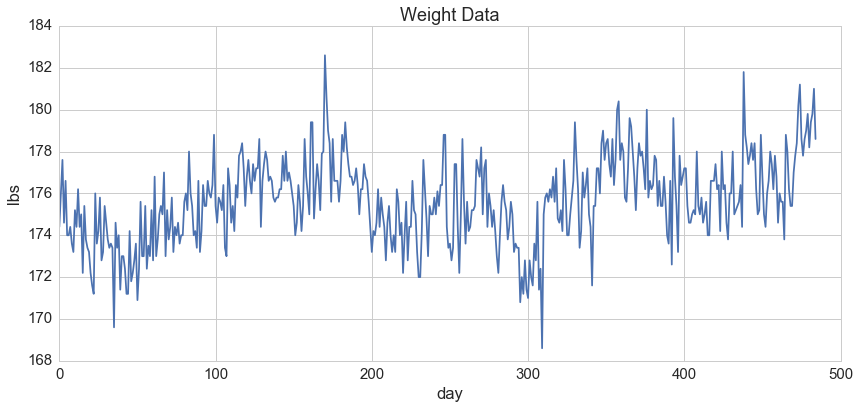

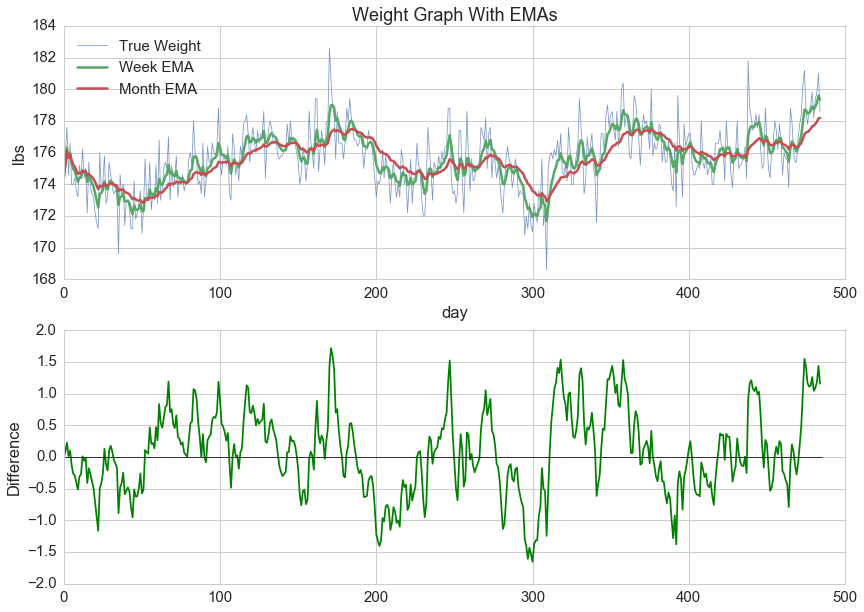

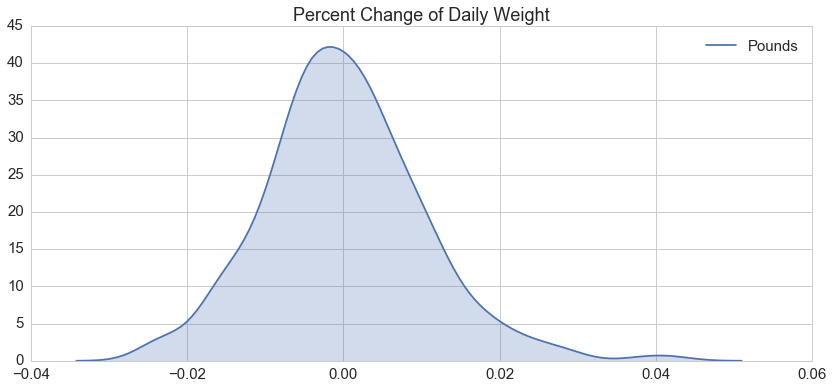

In [4]:
# Graph Data
graph.figure(figsize=figure_size)
graph.title('Weight Data')
graph.plot(data)
graph.ylabel('lbs')
graph.xlabel('day')
graph.show()

# EMA Graph
graph.figure(figsize=(14,10))

graph.subplot(211)
graph.title('Weight Graph With EMAs')
graph.plot(data, label='True Weight', linewidth=0.75, alpha=0.75)
graph.plot(week_ema, label='Week EMA', linewidth=2.5)
graph.plot(month_ema, label='Month EMA', linewidth=2.5)
graph.legend(loc=0)
graph.ylabel('lbs')
graph.xlabel('day')

graph.subplot(212)
graph.plot(ema_diff, color='green')
graph.plot([0, len(ema_diff)], [0, 0], color='black', linewidth=0.75)
graph.ylabel('Difference')
graph.show()

# Percent Weight change
graph.figure(figsize=figure_size)
graph.title('Percent Change of Daily Weight')
sns.kdeplot(data.pct_change(), shade=True)
graph.show()